In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
beh_MainFolder = "..\Data\Behavior_Data\\"
figures_MainFolder = "..\Figures\Behavior\\"

In [3]:
subs = ['13', '16', '17', '18', '21', '23', '26', '28', '29', '30', '31', '32', '33',
        '34', '35', '36', '38', '39', '40', '41', '42']

print(len(subs))

21


In [4]:
blocks = [0,1,2]
congruency = [80, 90, 100]

# Initialization
accuracy_block = np.zeros((len(blocks), len(subs)))
confidence_block = np.zeros((len(blocks), len(subs)))
RT_resp_block = np.zeros((len(blocks), len(subs)))
RT_conf_block = np.zeros((len(blocks), len(subs)))

accuracy_all = [[None], [None], [None]]
confidence_all = [[None], [None], [None]]
RT_resp_all = [[], [], []]
RT_conf_all = [[], [], []]
conf_l_all = [[], [], []]
corr_all, pitch_RT_all = [], []

In [5]:
for i,s in enumerate(subs):
    
    p_id = str(s) # participant to analyze
    print(p_id)
    beh_folder = beh_MainFolder + 'P'+p_id+'\\'


    pitch_V = len(blocks)*[None]
    pitch_RT = len(blocks)*[None]
    conf_V = len(blocks)*[None]
    conf_RT = len(blocks)*[None]
    resp_V = len(blocks)*[None]
    corr_V = len(blocks)*[None]
    trials_responded = len(blocks)*[None]
    confidence_responded = len(blocks)*[None]
    corr_3blocks, beh_rts_3blocks = [], []
    
    for bl in blocks:
        print(bl)
        if os.path.exists(beh_folder + 'Responses_S' + p_id + '_Block'+str(bl)+ '.npy'):
            pitch_V[bl], pitch_RT[bl], conf_V[bl], conf_RT[bl], resp_V[bl], corr_V[bl] = np.load(beh_folder + 'Responses_S' + p_id + '_Block'+str(bl)+ '.npy', allow_pickle = True)
            rts_res = []
            rts = []
            corr = []
            for tr in np.arange(len(pitch_V[bl])):
                #pitch_RT[bl][tr] >
                if pitch_V[bl][tr] != None and len(pitch_V[bl][tr]) > 0: # If we have a response:
                    rts.append(pitch_RT[bl][tr])
                    rts_res.append(pitch_V[bl][tr])
                    corr.append(corr_V[bl][tr])

                #else:
                #    if pitch_V[bl][tr] != None:
                #        rts.append(np.nan)
                #        rts_res.append(np.nan)
                #        corr.append(np.nan)



            accuracy_block[bl, i] = len(np.where(np.array(corr) == 1.0)[0])/len(corr)
            RT_resp_all[bl].append(rts)
            RT_resp_block[bl, i] = np.nanmean(rts)

            rts_c = []
            conf = []
            for tr in np.arange(len(conf_RT[bl])):

                if conf_RT[bl][tr] > 0 and len(conf_V[bl][tr]) > 0: # If we have a response:
                    rts_c.append(conf_RT[bl][tr])
                #else:
                #    if conf_V[bl][tr] != None:
                #        rts_c.append(np.nan)

                if conf_V[bl][tr] and len(conf_V[bl][tr]) > 0: # If we have a response:
                    conf.append(int(conf_V[bl][tr][0]))

                #else:
                #    if conf_V[bl][tr] != None:
                #        conf.append(np.nan)



            confidence_block[bl,i] = np.nanmean(np.array(conf))
            print(conf)
            RT_conf_block[bl,i] = np.nanmean(np.array(rts_c))
            
            RT_conf_all[bl].append(rts_c)
            conf_l_all[bl].append(conf)

            #np.save(save_folder + 'beh_block' + str(bl), [corr, rts_res, rts, conf, rts_c])
            print('corr len: ', len(corr))
            corr_3blocks.append(corr)
            beh_rts_3blocks.append(rts)
        else:
            print("File not found")

    corr_all.append(corr_3blocks)
    pitch_RT_all.append(beh_rts_3blocks)

13
0
[4, 2, 3, 1, 3, 3, 2, 3, 4, 4, 2, 4, 2, 1, 4, 2, 3, 2, 1, 4, 3, 2, 2, 1, 3, 4, 3, 2, 4, 3, 3, 2, 2, 3, 3, 2, 1, 2, 2, 2, 3, 3, 1, 4, 3, 3, 2, 3, 4, 2, 3, 2, 1, 3, 3, 4, 4, 2, 3, 1]
corr len:  58
1
[2, 1, 4, 3, 3, 3, 2, 4, 2, 4, 3, 2, 3, 2, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 3, 2, 4, 3, 1, 2, 3, 4, 4, 4, 3, 3, 1, 4, 1, 2, 4, 4, 3, 4, 3, 2, 2, 2, 2, 2, 3, 4, 2, 4, 3, 2, 2]
corr len:  59
2
[4, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 2, 3, 3, 4, 3, 4, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 1, 4, 4, 4, 1, 3, 4, 2, 2, 4, 4, 4, 4, 4, 4, 3, 3, 1, 4, 4, 3, 3, 4]
corr len:  57
16
0
[3, 2, 2, 3, 4, 3, 4, 3, 2, 3, 1, 2, 4, 2, 2, 3, 4, 3, 3, 1, 2, 4, 2, 2, 2, 3, 2, 3, 2, 2, 1, 3, 3, 2, 1, 2, 3, 2, 2, 3, 2, 3, 3, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 1, 3, 2, 1, 2, 3]
corr len:  56
1
[2, 2, 3, 4, 3, 3, 3, 4, 3, 2, 2, 3, 2, 4, 3, 2, 1, 3, 3, 4, 4, 3, 1, 2, 2, 2, 4, 1, 2, 4, 3, 1, 1, 2, 1, 3, 2, 4, 3, 3, 2, 2, 2, 2, 3, 1, 3, 3, 2, 1, 1, 2, 4, 1, 2, 1, 2, 1, 1, 1]
corr len:  58
2
[2, 4, 2, 2, 4, 3, 

[1, 2, 1, 3, 2, 1, 2, 3, 2, 2, 2, 4, 2, 1, 4, 2, 1, 2, 2, 3, 3, 2, 2, 2, 4, 4, 3, 2, 2, 1, 2, 3, 4, 2, 3, 3, 2, 3, 2, 3, 3, 1, 2, 4, 3, 3, 2, 3, 2, 2, 3, 2, 3, 2, 1, 2, 2, 3]
corr len:  52
1
[3, 3, 3, 2, 3, 4, 4, 4, 2, 3, 2, 2, 4, 2, 4, 3, 4, 4, 2, 2, 3, 2, 3, 2, 4, 2, 4, 3, 4, 4, 2, 3, 3, 2, 4, 3, 4, 4, 4, 4, 4, 4, 2, 2, 4, 2, 4, 4, 1, 1, 2, 2, 2, 4, 3, 3, 4, 4, 2]
corr len:  60
2
[3, 2, 4, 4, 4, 4, 4, 4, 2, 3, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]
corr len:  60
40
0
[1, 3, 2, 3, 1, 2, 2, 4, 1, 1, 4, 2, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2, 2, 3, 2, 1, 1, 2, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2]
corr len:  59
1
[1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
corr len:  59
2
[2, 2, 3, 2, 2, 2, 4, 3,

In [6]:
# add jitter to scatter plots
def rand_jitter(pos, arr):
    x_arr = []
    x = pos - 0.1
    for i in range(len(arr)):
        x_arr.append(x + np.random.randint(-50,50) / 1000)
        x = x + 0.1
        if x >= (pos + 0.19):
            x = pos - 0.1
    return x_arr

In [7]:

RT_resp_all[0] = [item for sublist in RT_resp_all[0] for item in sublist]
RT_resp_all[1] = [item for sublist in RT_resp_all[1] for item in sublist]
RT_resp_all[2] = [item for sublist in RT_resp_all[2] for item in sublist]

RT_conf_all[0] = [item for sublist in RT_conf_all[0] for item in sublist]
RT_conf_all[1] = [item for sublist in RT_conf_all[1] for item in sublist]
RT_conf_all[2] = [item for sublist in RT_conf_all[2] for item in sublist]

conf_l_all[0] = [item for sublist in conf_l_all[0] for item in sublist]
conf_l_all[1] = [item for sublist in conf_l_all[1] for item in sublist]
conf_l_all[2] = [item for sublist in conf_l_all[2] for item in sublist]



## Behavioral Results

In [8]:
# Color palette for omissions:
ColorsL = np.array(([194,165,207], [118,42,131], [64,0,75]))/256

# y axis values for all the plots
y=np.arange(len(subs))

In [9]:

corr_indices_all, pitch_rt_corr_all = [], []
incorr_indices_all, pitch_rt_incorr_all = [], []

for i in range(len(subs)):
    print('Subject: ', i)
    # get correct response indices 
    corr_indices, pitch_rt_corr = [], []
    incorr_indices, pitch_rt_incorr = [], []
    
    for j in range(len(blocks)):
        print('Block: ', j)
        # Correct
        corr_indices_tmp = [ind for ind in range(len(corr_all[i][j])) if corr_all[i][j][ind] == 1]
        corr_indices.append(corr_indices_tmp)
        print('corr_indices_tmp: ', corr_indices_tmp)
        #Incorrect
        incorr_indices_tmp = [ind for ind in range(len(corr_all[i][j])) if corr_all[i][j][ind] == -1]
        incorr_indices.append(incorr_indices_tmp)
        print('incorr_indices_tmp: ', incorr_indices_tmp)
        
        #print(np.asarray(pitch_RT_all[i][j])[corr_indices_tmp])
        pitch_rt_corr.append(np.asarray(pitch_RT_all[i][j])[corr_indices_tmp])
        if len(np.asarray(pitch_RT_all[i][j])[incorr_indices_tmp]) > 0:
            pitch_rt_incorr.append(np.asarray(pitch_RT_all[i][j])[incorr_indices_tmp])
        else:
            pitch_rt_incorr.append([np.nan])
    
    # Correct
    corr_indices_all.append(corr_indices)
    pitch_rt_corr_all.append(pitch_rt_corr)
    
    #Incorrect
    incorr_indices_all.append(incorr_indices)
    pitch_rt_incorr_all.append(pitch_rt_incorr)
        

Subject:  0
Block:  0
corr_indices_tmp:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 19, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 51, 52, 53, 54, 55, 56, 57]
incorr_indices_tmp:  [16, 18, 20, 21, 28, 36, 50]
Block:  1
corr_indices_tmp:  [0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 21, 23, 25, 27, 28, 31, 32, 34, 35, 36, 38, 40, 42, 43, 44, 46, 48, 50, 52, 54]
incorr_indices_tmp:  [1, 11, 12, 13, 14, 16, 17, 18, 19, 20, 22, 24, 26, 29, 30, 33, 37, 39, 41, 45, 47, 49, 51, 53, 55, 56, 57, 58]
Block:  2
corr_indices_tmp:  [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 43, 44, 45, 46, 47, 48, 49, 50, 52, 53, 54, 55, 56]
incorr_indices_tmp:  [4, 23, 27, 38, 41, 42, 51]
Subject:  1
Block:  0
corr_indices_tmp:  [1, 2, 3, 4, 5, 6, 7, 13, 15, 17, 23, 24, 27, 28, 35, 37, 38, 42, 43, 44, 46, 48]
incorr_indices_tmp:  [0, 8, 9, 10, 11, 12, 

In [10]:
pitch_rt_corr_all_meanPerBlock = np.zeros((len(subs), len(blocks)))
pitch_rt_incorr_all_meanPerBlock = np.zeros((len(subs), len(blocks)))

for i in range(len(subs)):
    for j in range(len(blocks)):
        pitch_rt_corr_all_meanPerBlock[i,j] = np.nanmean(pitch_rt_corr_all[i][j][:])
        pitch_rt_incorr_all_meanPerBlock[i,j] = np.nanmean(pitch_rt_incorr_all[i][j][:])
    

C:\Users\CCN_PG\miniconda3\envs\exp\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: Mean of empty slice
  import sys


### 80% Correct vs Incorrect

gr_i:  0
gr_i:  1


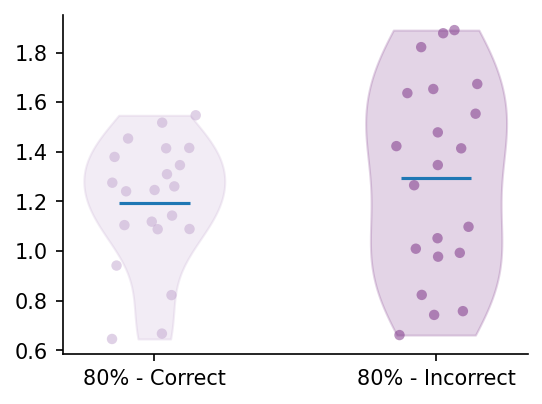

In [11]:
fig, ax = plt.subplots(figsize=(4,3), dpi=150)

# Add jitter and plot scatter plot
for gr_i in range(2):
    print('gr_i: ', gr_i)
    if gr_i == 0:
        gr = pitch_rt_corr_all_meanPerBlock[:,0]
    else:
        gr = pitch_rt_incorr_all_meanPerBlock[:,0]
            
    ax.scatter( rand_jitter((gr_i) * 1, gr), np.sort(gr), color = 'none', facecolors = ColorsL[gr_i], 
               alpha = .5, s = 25) #, label = group_name[x_i])


# Plot distribuion of results with violin plot
violin_parts = plt.violinplot([pitch_rt_corr_all_meanPerBlock[:,0], pitch_rt_incorr_all_meanPerBlock[:,0]], 
                              positions = [0, 1], vert=True,
                              showmeans=True, showextrema=False)


for ind, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(ColorsL[ind])
    pc.set_edgecolor(ColorsL[ind])
    pc.set_color(ColorsL[ind])
    pc.set_alpha(0.2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.ylim(ymin=0.3)
#plt.yticks([1, 2, 3, 4])
plt.xticks([0,1], ['80% - Correct','80% - Incorrect'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig1 = plt.gcf() # get current figure
#fig1.savefig(figures_MainFolder + 'Beh_Confidence.png', bbox_inches='tight')
plt.show()

In [12]:
from scipy.stats.mstats import kruskalwallis
from scipy.stats import wilcoxon
        
f,p = wilcoxon(pitch_rt_corr_all_meanPerBlock[:,0], pitch_rt_incorr_all_meanPerBlock[:,0])
print("Response RT @ 80%: correct vs incorrect: " + str(p))
if p <= 0.05:
    print('significant!')
else:
     print('not significant!')

Response RT @ 80%: correct vs incorrect: 0.16780662536621094
not significant!


### 90% Correct vs Incorrect

gr_i:  0
gr_i:  1


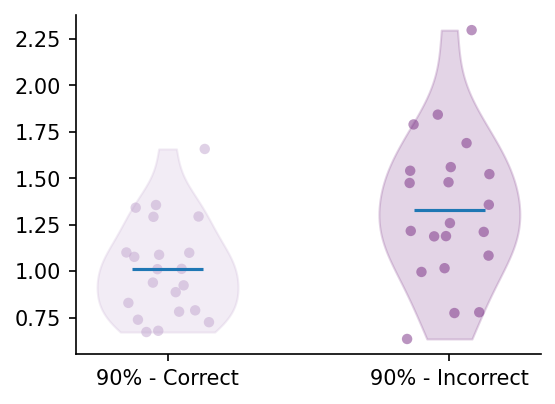

In [13]:
fig, ax = plt.subplots(figsize=(4,3), dpi=150)

for gr_i in range(2):
    print('gr_i: ', gr_i)
    if gr_i == 0:
        gr = pitch_rt_corr_all_meanPerBlock[:,1]
    else:
        gr = pitch_rt_incorr_all_meanPerBlock[:,1]
            
    ax.scatter( rand_jitter((gr_i) * 1, gr), np.sort(gr), color = 'none', facecolors = ColorsL[gr_i], 
               alpha = .5, s = 25) #, label = group_name[x_i])


# Plot distribuion of results with violin plot
violin_parts = plt.violinplot([pitch_rt_corr_all_meanPerBlock[:,1], pitch_rt_incorr_all_meanPerBlock[:,1]], 
                              positions = [0, 1], vert=True,
                              showmeans=True, showextrema=False)

for ind, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(ColorsL[ind])
    pc.set_edgecolor(ColorsL[ind])
    pc.set_color(ColorsL[ind])
    pc.set_alpha(0.2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.ylim(ymin=0.3)
#plt.yticks([1, 2, 3, 4])
plt.xticks([0,1], ['90% - Correct','90% - Incorrect'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig1 = plt.gcf() # get current figure
#fig1.savefig(figures_MainFolder + 'Beh_Confidence.png', bbox_inches='tight')
plt.show()

In [14]:
from scipy.stats.mstats import kruskalwallis
from scipy.stats import wilcoxon

        
f,p = wilcoxon(pitch_rt_corr_all_meanPerBlock[:,1], pitch_rt_incorr_all_meanPerBlock[:,1])
print("Response RT @ 90%: correct vs incorrect: " + str(p))
if p <= 0.05:
    print('significant!')
else:
     print('not significant!')

Response RT @ 90%: correct vs incorrect: 6.67572021484375e-05
significant!


### 100% Correct vs Incorrect

In [15]:
pitch_rt_incorr_all_meanPerBlock[:,2]

array([1.52041466, 1.55450573, 2.49815725,        nan, 1.7784982 ,
       2.0473055 ,        nan, 2.06252367, 1.40750031,        nan,
       2.42079082, 1.16474118, 1.02113155, 1.17667444, 1.82533753,
              nan, 0.53317332, 1.41404965,        nan, 1.39304577,
       1.60929613])

In [16]:
pitch_rt_incorr_all_mean_100 = pitch_rt_incorr_all_meanPerBlock[:,2] 
pitch_rt_incorr_all_mean_100 = pitch_rt_incorr_all_mean_100[~np.isnan(pitch_rt_incorr_all_mean_100)]
pitch_rt_incorr_all_mean_100

array([1.52041466, 1.55450573, 2.49815725, 1.7784982 , 2.0473055 ,
       2.06252367, 1.40750031, 2.42079082, 1.16474118, 1.02113155,
       1.17667444, 1.82533753, 0.53317332, 1.41404965, 1.39304577,
       1.60929613])

gr_i:  0
gr_i:  1


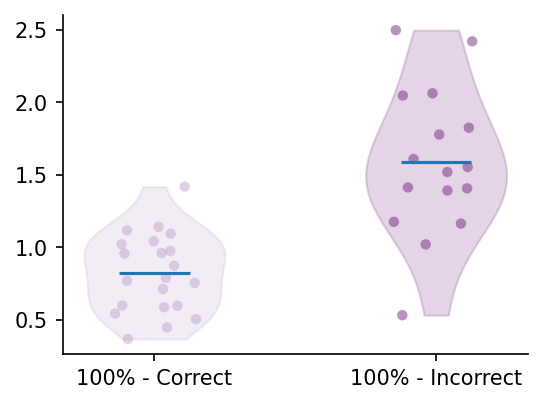

In [17]:
fig, ax = plt.subplots(figsize=(4,3), dpi=150)

for gr_i in range(2):
    print('gr_i: ', gr_i)
    if gr_i == 0:
        gr = pitch_rt_corr_all_meanPerBlock[:,2]
    else:
        gr = pitch_rt_incorr_all_meanPerBlock[:,2]
            
    ax.scatter( rand_jitter((gr_i) * 1, gr), np.sort(gr), color = 'none', facecolors = ColorsL[gr_i], 
               alpha = .5, s = 25) #, label = group_name[x_i])

# Plot distribuion of results with violin plot
violin_parts = plt.violinplot([pitch_rt_corr_all_meanPerBlock[:,2], pitch_rt_incorr_all_mean_100], 
                              positions = [0, 1], vert=True,
                              showmeans=True, showextrema=False)

for ind, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(ColorsL[ind])
    pc.set_edgecolor(ColorsL[ind])
    pc.set_color(ColorsL[ind])
    pc.set_alpha(0.2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.ylim(ymin=0.3)
#plt.yticks([1, 2, 3, 4])
plt.xticks([0,1], ['100% - Correct','100% - Incorrect'])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig1 = plt.gcf() # get current figure
#fig1.savefig(figures_MainFolder + 'Beh_Confidence.png', bbox_inches='tight')
plt.show()

In [18]:
pitch_rt_incorr_all_mean_100

array([1.52041466, 1.55450573, 2.49815725, 1.7784982 , 2.0473055 ,
       2.06252367, 1.40750031, 2.42079082, 1.16474118, 1.02113155,
       1.17667444, 1.82533753, 0.53317332, 1.41404965, 1.39304577,
       1.60929613])

In [19]:
from scipy.stats.mstats import kruskalwallis
from scipy.stats import wilcoxon
        
f,p = wilcoxon(pitch_rt_corr_all_meanPerBlock[:,2], pitch_rt_incorr_all_mean_100)
print("Response RT @ 100%: correct vs incorrect: " + str(p))
if p <= 0.05:
    print('significant!')
else:
     print('not significant!')

ValueError: The samples x and y must have the same length.

### Correct vs Incorrect

In [20]:
pitch_rt_corr_all_meanPerBlock_avg = np.nanmean(pitch_rt_corr_all_meanPerBlock, axis=1)
pitch_rt_corr_all_meanPerBlock_avg

array([1.24256751, 1.43306623, 1.07555111, 0.96230348, 0.83903296,
       1.11036411, 0.8189208 , 1.35686525, 1.02806427, 0.97859045,
       0.81191321, 0.82839671, 0.70485704, 1.05816363, 1.07916892,
       0.61370597, 0.84510808, 0.97351707, 1.13612975, 1.17441978,
       1.13018178])

In [21]:
pitch_rt_incorr_all_meanPerBlock_avg = np.nanmean(pitch_rt_incorr_all_meanPerBlock, axis=1)
pitch_rt_incorr_all_meanPerBlock_avg

array([1.53253625, 1.66008669, 1.74585426, 1.27440173, 1.43104167,
       1.76071154, 1.11779229, 1.75857148, 1.14415727, 1.31499051,
       1.45558626, 1.01358775, 0.82631542, 1.45509121, 1.66414708,
       0.71778095, 0.93190866, 1.542227  , 1.25304087, 1.47757163,
       1.6363905 ])

gr_i:  0
gr_i:  1


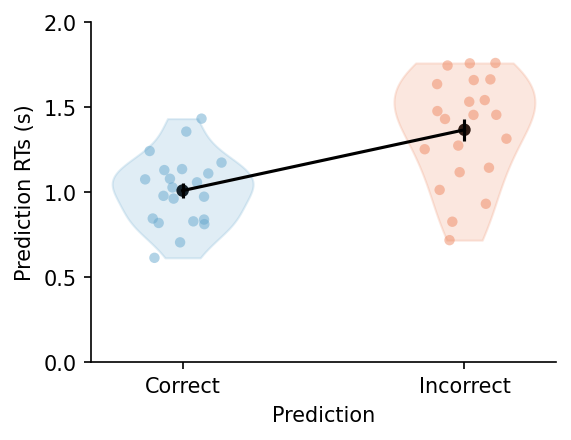

In [34]:

ColorsL = np.array(([103,169,207], [239,138,98]))/256 # colors: 1st corr: blue, 2nd incorr: orange

fig, ax = plt.subplots(figsize=(4,3), dpi=150)
gr_i_list = [0, 1]
gr_list = []
# Add jitter and plot scatter plot
for gr_i in range(2):
    print('gr_i: ', gr_i)
    if gr_i == 0:
        gr = pitch_rt_corr_all_meanPerBlock_avg
        gr_list.append(np.mean(gr))
    else:
        gr = pitch_rt_incorr_all_meanPerBlock_avg
        gr_list.append(np.mean(gr))
            
    ax.scatter( rand_jitter((gr_i) * 1, gr), np.sort(gr), color = 'none', facecolors = ColorsL[gr_i], 
               alpha = .5, s = 25) #, label = group_name[x_i])
    
    plt.scatter(x=gr_i, y=np.mean(gr), color='none', facecolors='black')
    yerr=[np.std(gr)/np.sqrt(len(gr))]
    plt.errorbar(x=gr_i,  y=np.mean(gr), yerr=yerr, c='black')
    
plt.plot(gr_i_list, gr_list, color='black')

# Plot distribuion of results with violin plot
violin_parts = plt.violinplot([pitch_rt_corr_all_meanPerBlock_avg, pitch_rt_incorr_all_meanPerBlock_avg], 
                              positions = [0, 1], vert=True,
                              showmeans=False, showextrema=False)




for ind, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(ColorsL[ind])
    pc.set_edgecolor(ColorsL[ind])
    pc.set_color(ColorsL[ind])
    pc.set_alpha(0.2)
    
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
#plt.ylim(ymin=0.3)
plt.yticks([0, 0.5, 1, 1.5, 2])
plt.xticks([0,1], ['Correct','Incorrect'])
plt.ylabel('Prediction RTs (s)')
plt.xlabel('Prediction')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

fig1 = plt.gcf() # get current figure
#fig1.savefig(figures_MainFolder + 'Beh_Confidence.png', bbox_inches='tight')
plt.show()

In [23]:
from scipy.stats.mstats import kruskalwallis
from scipy.stats import wilcoxon
        
f,p = wilcoxon(pitch_rt_corr_all_meanPerBlock_avg, pitch_rt_incorr_all_meanPerBlock_avg)
print("Response RT corrext vs incorrect: " + str(p))
if p <= 0.05:
    print('significant!')
else:
     print('not significant!')

        

Response RT corrext vs incorrect: 9.5367431640625e-07
significant!
